# Feature selection

## 1. Original data: PCA/tSNE spaces

In [1]:
import os
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

project_path = os.path.abspath("..")  # The correct project root
if project_path not in sys.path:
    sys.path.append(project_path)
    
from utils.utils import process_aerob_dataset, pca_run_and_plot, tsne_plot

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")    

data_filename_orig = "../data_aerob/all_gene_annotations.added_incompleteness_and_contamination.training.tsv"
y_filename = "../data_aerob/bacdive_scrape_20230315.json.parsed.anaerobe_vs_aerobe.with_cyanos.csv"
data_filename_test = "../data_aerob/all_gene_annotations.added_incompleteness_and_contamination.testing.tsv"

X_train, X_train_column_names, y_train, d_gtdb_train = process_aerob_dataset(data_filename_orig, y_filename, device, remove_noise = True)
X_test, X_test_column_names, y_test, d_gtdb_test = process_aerob_dataset(data_filename_test, y_filename, device, remove_noise = True)

Counts of each class in training/test data: shape: (2, 2)
┌──────────────┬──────┐
│ oxytolerance ┆ len  │
│ ---          ┆ ---  │
│ str          ┆ u32  │
╞══════════════╪══════╡
│ aerobe       ┆ 1621 │
│ anaerobe     ┆ 828  │
└──────────────┴──────┘
Counts of each class in training/test data: shape: (2, 2)
┌──────────────┬─────┐
│ oxytolerance ┆ len │
│ ---          ┆ --- │
│ str          ┆ u32 │
╞══════════════╪═════╡
│ anaerobe     ┆ 227 │
│ aerobe       ┆ 485 │
└──────────────┴─────┘


Data after PCA reduction: (2449, 20)
Explained variance ratio: [0.10835527 0.0645641  0.05870414 0.0544152  0.04229488 0.02906308
 0.02615682 0.02047376 0.01851462 0.01211512 0.01138997 0.00946629
 0.00882321 0.00834326 0.00750304 0.00715329 0.00638576 0.00617543
 0.00590754 0.00570269]
Total explained variance: 0.5115074614537869
Shape of the projected data = (2449, 2)


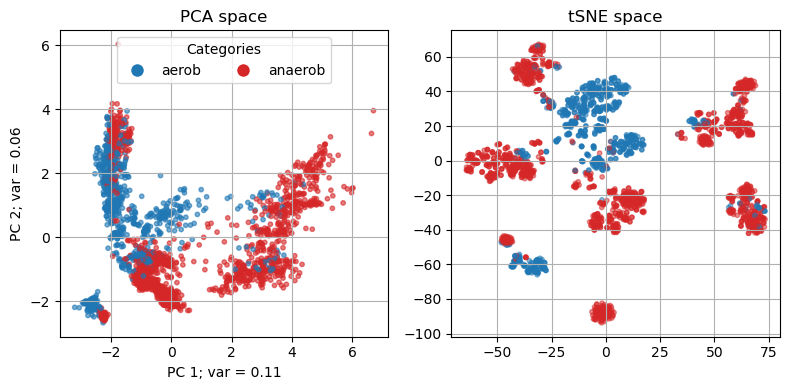

In [2]:
plt.figure(figsize=(8, 4))

# PCA space
plt.subplot(1, 2, 1) 
n_compon = 20
colors = ListedColormap(["tab:blue", "tab:red"])
category_names = ["aerob" if yi == 0 else "anaerob" for yi in y_train]
pca_run_and_plot(X_train, n_compon, y_train, category_names, colors);

# t-SNE space
plt.subplot(1, 2, 2) 
tsne_plot(X_train, y_train);

# Display the plots
plt.tight_layout()  
plt.show()

## 2. Explore the features

### 2.1 PCA and tSNE projections

In [2]:
X = np.array(X_train)
X_transposed = X.T

Data after PCA reduction: (2672, 20)
Explained variance ratio: [0.25411543 0.0633349  0.04107034 0.03866293 0.03333748 0.02070654
 0.01802992 0.01600207 0.01446775 0.01268802 0.01188863 0.01076668
 0.00863826 0.00753277 0.00738464 0.00675998 0.0059397  0.00527351
 0.00499803 0.00490813]
Total explained variance: 0.5865057012997568
Shape of the projected data = (2672, 2)


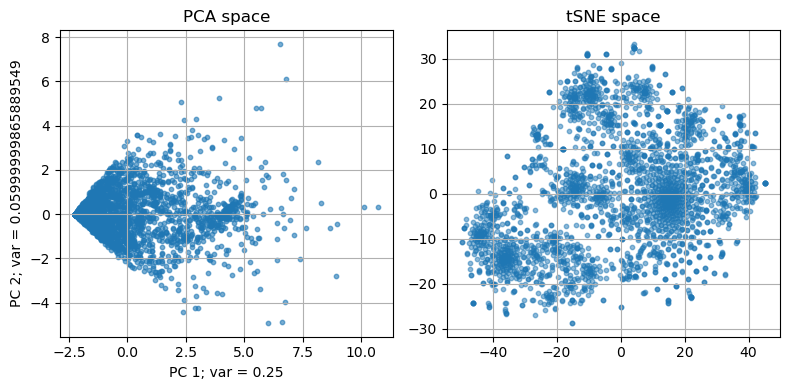

In [4]:
plt.figure(figsize=(8, 4))

# PCA space
plt.subplot(1, 2, 1) 
n_compon = 20
colors = ListedColormap(["tab:blue", "tab:red"])
category_names = ["aerob" if yi == 0 else "anaerob" for yi in y_train]
pca_run_and_plot(X_transposed, n_compon);

# t-SNE space
plt.subplot(1, 2, 2) 
tsne_plot(X_transposed);

# Display the plots
plt.tight_layout()  
plt.show()

### 2.2 Explore the count distributions of the features

In [3]:
import numpy as np
import matplotlib.pyplot as plt

non_zero_counts = np.count_nonzero(X_train, axis=0)
print(non_zero_counts)

[2051 2028  771 ...  206  948  200]


Text(0.5, 1.0, 'Non-zero counts in features')

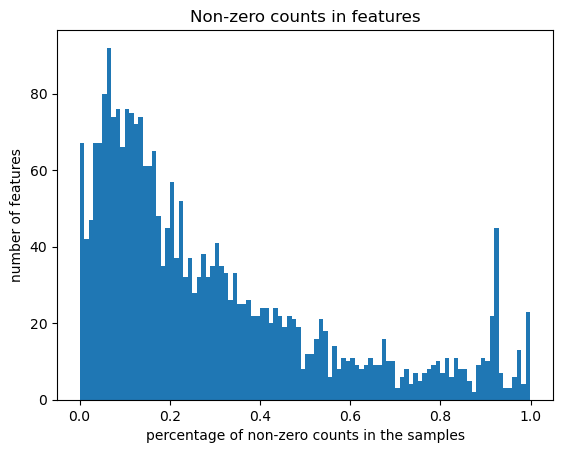

In [4]:
num_sampl = X_train.shape[0]
num_feat = X_train.shape[1]
non_zero_percent = [count/num_sampl for count in non_zero_counts]

hist = plt.hist(non_zero_percent, bins = 100)
plt.xlabel("percentage of non-zero counts in the samples")
plt.ylabel("number of features")
plt.title("Non-zero counts in features")

In [5]:
# Sort both lists by values in descending order
sorted_pairs = sorted(zip(non_zero_percent, X_train_column_names), reverse=True)

# Unzip the sorted pairs back into separate lists
non_zero_percent_sort, X_train_column_names_sort = zip(*sorted_pairs)

Text(0.5, 1.0, 'Mean count values for the features')

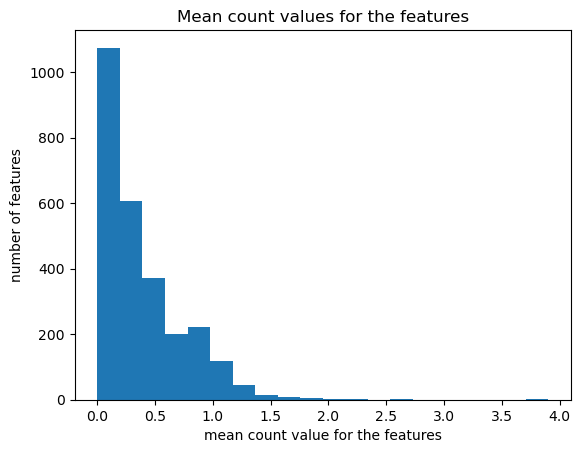

In [6]:
means = [np.mean(a) for a in X_transposed]
hist = plt.hist(means, bins = 20)
plt.xlabel("mean count value for the features")
plt.ylabel("number of features")
plt.title("Mean count values for the features")

### 2.3 Box Plots

In [13]:
X_train_np = np.array(X_train)
X_train_transposed = X_train_np.T
print(f"X_train_transposed shape = {X_train_transposed.shape}")

# Calculate mean and var values for each feature and sort them
mean_median_pairs = [(i, np.var(dist), dist.mean()) for i, dist in enumerate(X_train_transposed)]
sorted_by_mean_var = sorted(mean_median_pairs, key=lambda x: (x[1], x[2]), reverse=True)
sorted_cog_idx_by_mean_var = [i for i, _, _ in sorted_by_mean_var]

N = 10
top_indices = sorted_cog_idx_by_mean_var[:N]
top_names_mean_var = [X_test_column_names[i] for i in top_indices]
top_feat_mean_var_counts = [X_train_transposed[i] for i in sorted_cog_idx_by_mean_var[:N]]
print(f"{N} COGS with top var/mean values {top_names_mean_var}")

X_train_transposed shape = (2672, 2449)
10 COGS with top var/mean values ['COG3181', 'COG4753', 'COG2972', 'COG1609', 'COG4209', 'COG1175', 'COG3629', 'COG1802', 'COG0559', 'COG1172']


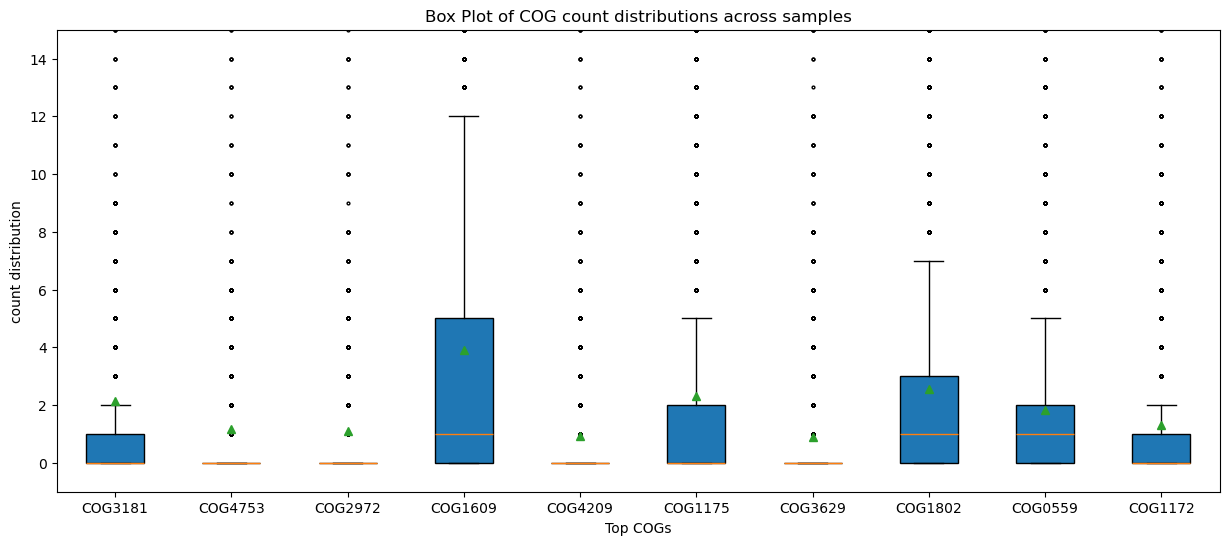

In [12]:
plt.figure(figsize=(15, 6))
flier_props = dict(marker='o', color='red', markersize=2)
plt.boxplot(top_distributions, patch_artist=True, flierprops=flier_props, showmeans=True)

plt.title('Box Plot of COG count distributions across samples')
plt.xlabel('Top COGs')
plt.ylabel('count distribution')
plt.xticks(range(1,len(top_names)+1), top_names)

plt.ylim([-1,15])
plt.show()

## 3. Reduced feature space

### 3.1 Variance and mean selection

In [13]:
# Generate a dataset for the 2D projections
N = 10 # select top N features
top_indices = sorted_cog_idx_by_mean_var[:N]
X_top_feat = np.array([X_transposed[i] for i in top_indices])
X = X_top_feat.T
X.shape

(2449, 10)

Data after PCA reduction: (2449, 10)
Explained variance ratio: [4.5626867e-01 1.9747798e-01 1.2329289e-01 6.6881783e-02 5.2753661e-02
 4.0016357e-02 3.3596635e-02 2.5730489e-02 3.9246869e-03 5.6807879e-05]
Total explained variance: 0.9999999622777977
Shape of the projected data = (2449, 2)


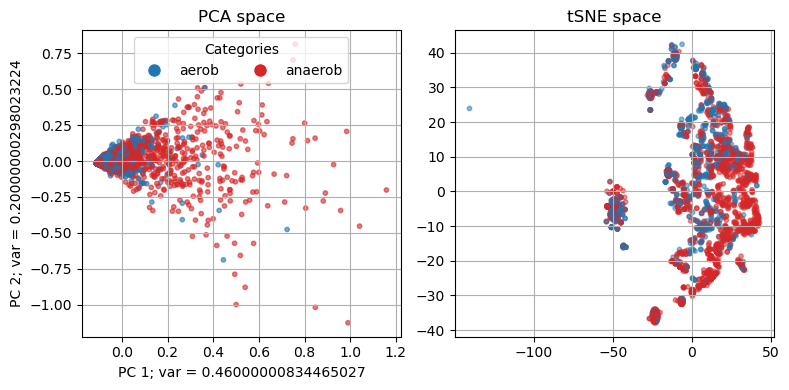

In [14]:
plt.figure(figsize=(8, 4))

# PCA space
plt.subplot(1, 2, 1) 
n_compon = 10
pca_run_and_plot(X, n_compon, y_train, category_names, colors);

# t-SNE space
plt.subplot(1, 2, 2) 
tsne_plot(X, y_train);

# Display the plots
plt.tight_layout()  
plt.show()

In [49]:
from feature_selection_utils import xgboost_train_accur, xgboost_accur_select_features

(baseline_accuracy, _) = xgboost_train_accur(X_train, y_train, X_test, y_test)
print(f"XGBoost baseline test accuracy (all features) = {baseline_accuracy}")

XGBoost baseline test accuracy (all features) = 0.9662921348314607


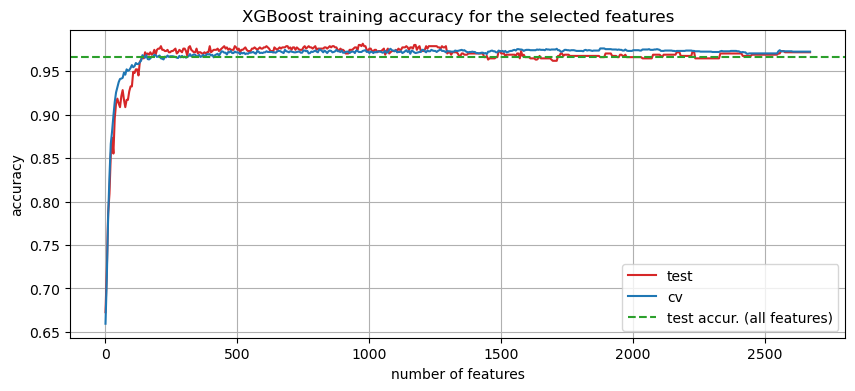

In [50]:
feat_step = 5
cv_accur_arr, test_accur_arr, num_feat = xgboost_accur_select_features(X_train, X_test, y_train, y_test, sorted_cog_idx_by_mean_var, baseline_accuracy, feat_step)       

In [18]:
print(cv_accur_arr[0])
print(test_accur_arr[0])

0.659454112933517
0.672752808988764


### 3.2  Mutual Information

In [15]:
from feature_selection_utils import mutual_info_features

sorted_cog_idx_by_mi, sorted_mi, sorted_names = mutual_info_features(X_train, y_train, X_train_column_names)

In [16]:
# Select the top N features
N = 10
top_N_indices = sorted_cog_idx_by_mi[:N]
top_N_mi = sorted_mi[:N]
top_N_names_by_mi = sorted_names[:N]
top_feat_mi_counts = [X_train_transposed[i] for i in sorted_cog_idx_by_mi[:N]]

print(f"Top {N} COGs:", top_N_names_by_mi)

Top 10 COGs: ['COG0109', 'COG1592', 'COG1612', 'COG0026', 'COG1014', 'COG0508', 'COG0567', 'COG0276', 'COG0843', 'COG0365']


In [53]:
X_top_feat = np.array([X_transposed[i] for i in sorted_cog_idx_by_mi[:N]])

Data after PCA reduction: (2449, 5)
Explained variance ratio: [0.60596025 0.08903357 0.07882238 0.05853073 0.04191238]
Total explained variance: 0.8742593117058277
Shape of the projected data = (2449, 2)


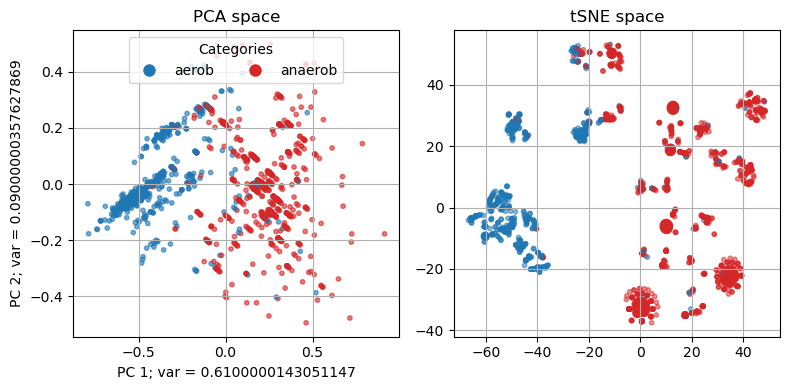

In [23]:
plt.figure(figsize=(8, 4))

# PCA space
plt.subplot(1, 2, 1) 
n_compon = 10 
pca_run_and_plot(X_top_feat.T, n_compon, y_train, category_names, colors);

# t-SNE space
plt.subplot(1, 2, 2) 
tsne_plot(X_top_feat.T, y_train);

# Display the plots
plt.tight_layout()  
plt.show()


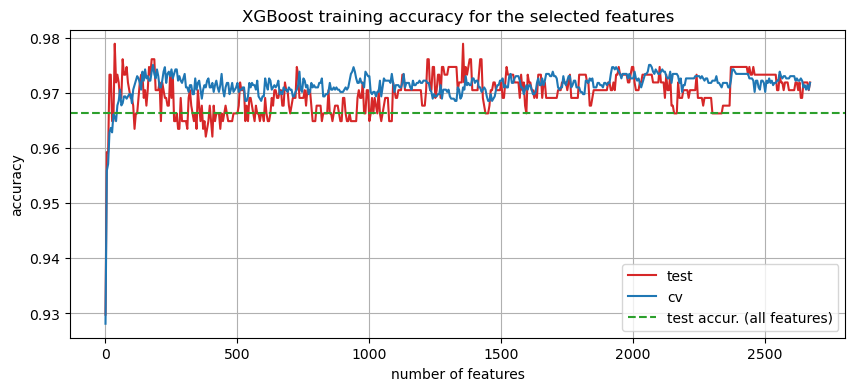

In [54]:
feat_step = 5
cv_accur_arr, test_accur_arr, num_feat = xgboost_accur_select_features(X_train, X_test, y_train, y_test, sorted_cog_idx_by_mi, baseline_accuracy, feat_step)       

In [25]:
print(cv_accur_arr[0])
print(test_accur_arr[0])

0.9281332164767747
0.9297752808988764


### 3.3  Random Forest

Feature importances: [1.99233830e-03 1.38545221e-04 3.35176452e-04 ... 8.77389198e-05
 5.37587248e-05 3.44284551e-05]
2672
Original feature count: 2672, Selected feature count: 291


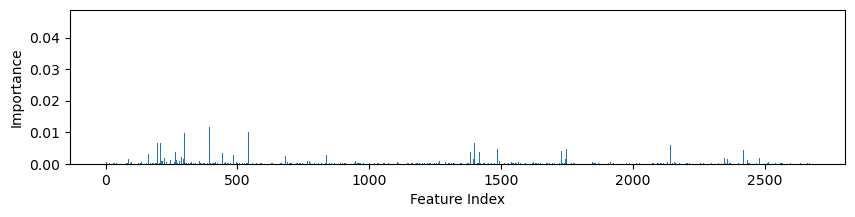

In [19]:
from feature_selection_utils import random_forest_features
sorted_cog_idx_by_rand_forest, sorted_importances, sorted_names = random_forest_features(X_train, y_train, X_train_column_names)

In [20]:
# Select the top N features
N = 10
top_N_indices = sorted_cog_idx_by_rand_forest[:N]
top_N_importances = sorted_importances[:N]
top_N_names_by_rand_forest = sorted_names[:N]
top_feat_rand_forest_counts = [X_train_transposed[i] for i in sorted_cog_idx_by_rand_forest[:N]]
print(f"Top {N} COGs:", top_N_names_by_rand_forest)

Top 10 COGs: ['COG0109', 'COG1592', 'COG0508', 'COG0843', 'COG4231', 'COG1014', 'COG0567', 'COG0225', 'COG1328', 'COG0365']


In [30]:
X_top_feat = np.array([X_transposed[i] for i in sorted_cog_idx_by_rand_forest[:N]])

Data after PCA reduction: (2449, 5)
Explained variance ratio: [0.48487613 0.12372399 0.09528448 0.07683493 0.06103966]
Total explained variance: 0.8417591825127602
Shape of the projected data = (2449, 2)


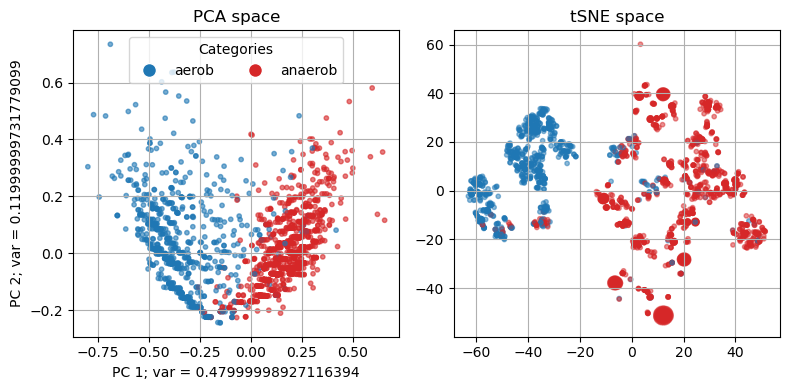

In [31]:
plt.figure(figsize=(8, 4))

# PCA space
plt.subplot(1, 2, 1) 
n_compon = 5
pca_run_and_plot(X_top_feat.T, n_compon, y_train, category_names, colors);

# t-SNE space
plt.subplot(1, 2, 2) 
tsne_plot(X_top_feat.T, y_train);

# Display the plots
plt.tight_layout()  
plt.show()


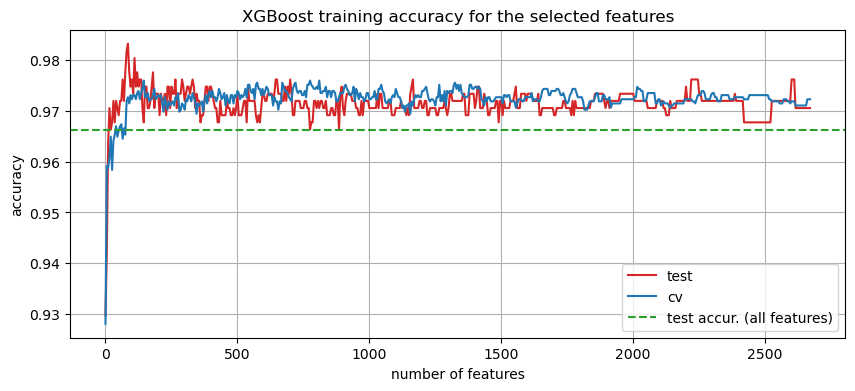

In [55]:
feat_step = 5
cv_accur_arr, test_accur_arr, num_feat = xgboost_accur_select_features(X_train, X_test, y_train, y_test, sorted_cog_idx_by_rand_forest, baseline_accuracy, feat_step)       

In [33]:
print(cv_accur_arr[0])
print(test_accur_arr[0])

0.9281332164767747
0.9297752808988764


### 3.4 Support Vector Classification

In [22]:
from feature_selection_utils import svc_features

sorted_cog_idx_by_svc, sorted_importances, sorted_names = svc_features(X_train, y_train, X_train_column_names)

In [23]:
N = 10
top_features = sorted_cog_idx_by_svc[:N]
top_sorted_names_by_svc = sorted_names[:N]
top_feat_svc_counts = [X_train_transposed[i] for i in sorted_cog_idx_by_svc[:N]]
print(f"Top {N} Feature Names:", top_sorted_names_by_svc)

Top 10 Feature Names: ['COG0109', 'COG1592', 'COG1328', 'COG1014', 'COG4231', 'COG0674', 'COG1350', 'COG1741', 'COG0167', 'COG0365']


In [38]:
X_top_feat = np.array([X_transposed[i] for i in sorted_cog_idx_by_svc[:N]])

Data after PCA reduction: (2449, 5)
Explained variance ratio: [0.4584382  0.12710068 0.11868916 0.08355912 0.0581397 ]
Total explained variance: 0.8459268398582935
Shape of the projected data = (2449, 2)


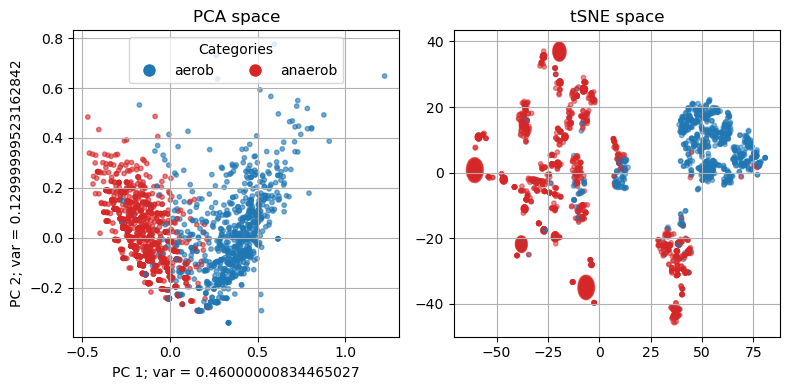

In [39]:
# Plot PCA and tSNE for the selected top features
plt.figure(figsize=(8, 4))

# PCA space
plt.subplot(1, 2, 1) 
n_compon = 5
pca_run_and_plot(X_top_feat.T, n_compon, y_train, category_names, colors);

# t-SNE space
plt.subplot(1, 2, 2) 
tsne_plot(X_top_feat.T, y_train);

# Display the plots
plt.tight_layout()  
plt.show()

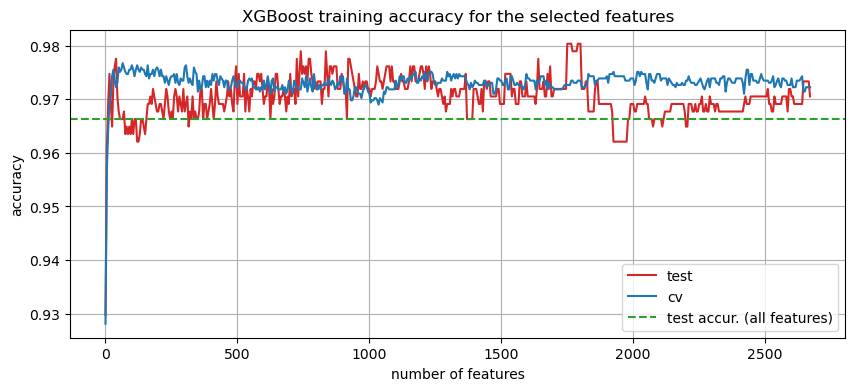

In [62]:
feat_step = 5
cv_accur_arr, test_accur_arr, num_feat = xgboost_accur_select_features(X_train, X_test, y_train, y_test, sorted_cog_idx_by_svc, baseline_accuracy, feat_step)       

In [41]:
print(cv_accur_arr[0])
print(test_accur_arr[0])

0.9281332164767747
0.9297752808988764


## Inmermediate summary of the results

In [61]:
import pandas as pd

# Define the data for the columns
data = {
    'Variance/mean': top_names_mean_var,
    'Mutual Information': top_N_names_by_mi,
    'Random Forest': top_N_names_by_rand_forest,
    'SVC': top_sorted_names_by_svc
}

# Create DataFrame with specified column names
df = pd.DataFrame(data)

# Print the DataFrame
display(df)


,Variance/mean,Mutual Information,Random Forest,SVC
0,COG3181,COG0109,COG0109,COG0109
1,COG4753,COG1592,COG1592,COG1592
2,COG2972,COG1612,COG0508,COG1328
3,COG1609,COG0026,COG0843,COG1014
4,COG4209,COG0508,COG4231,COG4231
5,COG1175,COG0843,COG1014,COG0674
6,COG3629,COG0567,COG0567,COG1350
7,COG1802,COG0276,COG0225,COG1741
8,COG0559,COG1014,COG1328,COG0167
9,COG1172,COG0065,COG0365,COG0365


In [29]:
top_feat_mean_var_counts
top_feat_mi_counts
top_feat_rand_forest_counts
top_feat_svc_counts

[array([0., 1., 0., ..., 1., 1., 0.], dtype=float32),
 array([1., 0., 1., ..., 1., 0., 0.], dtype=float32),
 array([2., 0., 1., ..., 0., 0., 0.], dtype=float32),
 array([3., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([2., 0., 0., ..., 0., 1., 0.], dtype=float32),
 array([2., 1., 1., ..., 1., 0., 1.], dtype=float32),
 array([1., 0., 2., ..., 1., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 1., 1., 0.], dtype=float32),
 array([1., 1., 1., ..., 0., 0., 1.], dtype=float32),
 array([1., 1., 0., ..., 1., 2., 3.], dtype=float32)]

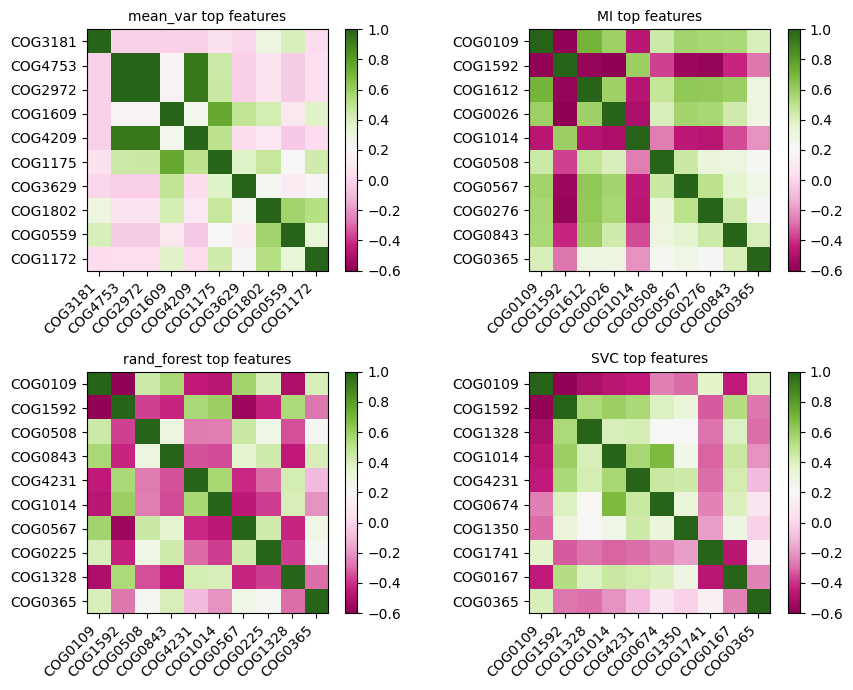

In [63]:
plt.figure(figsize=(9, 7))

vmin, vmax = -0.6, 1 #-0.6

# Correlation matrix for mean_var top features
plt.subplot(2, 2, 1) 
correlation_matrix = np.corrcoef(top_feat_mean_var_counts)
plt.imshow(correlation_matrix, vmin=vmin, vmax=vmax, cmap="PiYG")
plt.title("mean_var top features", fontsize=10)
plt.xticks(ticks=np.arange(len(top_names_mean_var)), labels=top_names_mean_var, rotation=45, ha="right")
plt.yticks(ticks=np.arange(len(top_names_mean_var)), labels=top_names_mean_var)
plt.colorbar()

# Correlation matrix for MI top features
plt.subplot(2, 2, 2) 
correlation_matrix = np.corrcoef(top_feat_mi_counts)
plt.imshow(correlation_matrix, vmin=vmin, vmax=vmax, cmap="PiYG")
plt.title("MI top features", fontsize=10)
plt.xticks(ticks=np.arange(len(top_N_names_by_mi)), labels=top_N_names_by_mi, rotation=45, ha="right")
plt.yticks(ticks=np.arange(len(top_N_names_by_mi)), labels=top_N_names_by_mi)
plt.colorbar()

# Correlation matrix for rand_forest top features
plt.subplot(2, 2, 3) 
correlation_matrix = np.corrcoef(top_feat_rand_forest_counts)
plt.imshow(correlation_matrix, vmin=vmin, vmax=vmax, cmap="PiYG")
plt.title("rand_forest top features", fontsize=10)
plt.xticks(ticks=np.arange(len(top_N_names_by_rand_forest)), labels=top_N_names_by_rand_forest, rotation=45, ha="right")
plt.yticks(ticks=np.arange(len(top_N_names_by_rand_forest)), labels=top_N_names_by_rand_forest)
plt.colorbar()

# Correlation matrix for SVC top features
plt.subplot(2, 2, 4) 
correlation_matrix = np.corrcoef(top_feat_svc_counts)
plt.imshow(correlation_matrix, vmin=vmin, vmax=vmax, cmap="PiYG")
plt.title("SVC top features", fontsize=10)
plt.xticks(ticks=np.arange(len(top_sorted_names_by_svc)), labels=top_sorted_names_by_svc, rotation=45, ha="right")
plt.yticks(ticks=np.arange(len(top_sorted_names_by_svc)), labels=top_sorted_names_by_svc)
plt.colorbar()

# Display the plots
plt.tight_layout()  
plt.show()

## Some extra methods are still in progress (we might need them for other more complex datasets)....
### 3.3  ElasticNetCV

In [34]:
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
import numpy as np


from sklearn.preprocessing import MaxAbsScaler
# Step 1: Scale features for better regression results
scaler = MaxAbsScaler()

# Fit and transform the data
X_train_scaled = scaler.fit_transform(X_train)

#X_train, y_train

# Step 2: Train ElasticNet with Cross-Validation
elastic_net = ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 1.0],  # Mixing parameter, 1.0 is Lasso
                            cv=5, random_state=42)
elastic_net.fit(X_train_scaled, y_train)

# Step 3: Retrieve feature coefficients
coef = elastic_net.coef_

# Step 4: Select non-zero features (important features)
important_features_indices = np.where(coef != 0)[0]
print("Important Features Indices:", important_features_indices)

# Optional: Print sorted features by importance
sorted_indices = np.argsort(-np.abs(coef))  # Sort by absolute coefficient value
print("Top features sorted by importance:", sorted_indices[:5])


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.191e-02, tolerance: 4.131e-02
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.025e-02, tolerance: 4.131e-02
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.880e-02, toler

KeyboardInterrupt: 

In [ ]:
N = 30
top_indices = sorted_indices[:N]
X_top_feat = np.array([X_transposed[i] for i in top_indices])
print("Top names by importance:", sorted_names[:N])
pca_run_and_plot(X_top_feat.T, n_compon, y_train, category_names, colors)

In [210]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Example: X_train is your feature matrix (DataFrame)

X_train_np = X_train.numpy() if isinstance(X_train, torch.Tensor) else X_train

feature_names = [f"Feature_{i+1}" for i in range(X_train_np.shape[1])]

X_with_const = add_constant(X_train_np)

# Convert back to DataFrame for easier handling
X_with_const_df = pd.DataFrame(X_with_const, columns=['const'] + feature_names)


# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_with_const_df.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const_df.values, i) for i in range(X_with_const_df.shape[1])]

print(vif_data)

# Select features with VIF below a threshold (e.g., 10)
threshold = 10
selected_features = vif_data[vif_data['VIF'] < threshold]

# Print selected features
print(f"Selected features: {selected_features['Feature'].values}")

KeyboardInterrupt: 